**Step 1. Project Description**
In this project, we will use the standard machine-learning problem called the iris flowers dataset:

http://archive.ics.uci.edu/ml/datasets/Iris 

This dataset is well studied and is a good problem for practicing on neural networks because all of the 4 input variables are numeric and have the same scale in centimeters. Each instance describes the properties of an observed flower measurements and the output variable is specific iris species.

This is a multi-class classification problem, meaning that there are more than two classes to be predicted, in fact there are three flower species. This is an important type of problem on which to practice with neural networks because the three class values require specialized handling.

The iris flower dataset is a well-studied problem and as such we can expect to achieve model accuracy in the range of 95% to 97%. This provides a good target to aim for when developing our models in this project.


**Step 2. Making Preparations**
We will start off by importing all of the classes and functions we will need. This includes both the functionality we require from Keras, but also data loading from pandas as well as data preparation and model evaluation from scikit-learn:

In [1]:
import numpy
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from keras.utils import np_utils

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)



Using TensorFlow backend.


In [2]:
#uploading csv file

from google.colab import files
uploaded = files.upload()

Saving iris.csv to iris.csv


In [3]:
#Importing file

import io
data = io.BytesIO(uploaded['iris.csv'])

In [4]:
# load dataset
dataframe = pandas.read_csv("iris.csv", header=None)
dataset = dataframe.values
X = dataset[:,0:4].astype(float)
Y = dataset[:,4]

In [5]:
dataframe[:8]

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa


In [6]:
print(X[7])
Y[7]

[5.  3.4 1.5 0.2]


'Iris-setosa'

In [7]:
from keras.utils import np_utils

# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)


In [8]:
print(encoded_Y)
dummy_y[:7]

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

**Step 3: Define the Neural Network Baseline Model**

In [12]:
# baseline model

def baseline_model():
#creating a model
    
    model=Sequential()
    model.add(Dense(8, activation='relu', input_shape=(4,)))
    model.add(Dense(3, activation='softmax'))
    
    #compiling it
    model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
    return model


In [14]:
# evaluate model with standardized dataset

estimator = KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=5, verbose=0)


**Step 4. Evaluate The Model with k-Fold Cross Validation**

In [15]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=10, shuffle=True, random_state=seed)

results = cross_val_score(estimator, X, dummy_y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: 97.33% (4.42%)


**Step 5. Tuning Layers and Number of Neurons in The Model**

In [0]:
#Step 5.1. Evaluate a Smaller Network

# smaller model

def smaller_model():
#creating a model
    
    model=Sequential()
    model.add(Dense(4, activation='relu', input_shape=(4,)))
    model.add(Dense(3, activation='softmax'))
    
    #compiling it
    model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
    return model


In [39]:
estimator = KerasClassifier(build_fn=create_baseline, epochs=200, batch_size=5, verbose=0)

kfold = KFold(n_splits=10, shuffle=True, random_state=seed)

results = cross_val_score(estimator, X, dummy_y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: 96.67% (4.47%)


In [41]:
#Step 5.2. Evaluate a Larger Network

# larger model

def larger_model():
#creating a model
    
    model=Sequential()
    model.add(Dense(16, activation='relu', input_shape=(4,)))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    
    #compiling it
    model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
    return model


In [42]:
estimator = KerasClassifier(build_fn=larger_model, epochs=200, batch_size=5, verbose=0)

kfold = KFold(n_splits=10, shuffle=True, random_state=seed)

results = cross_val_score(estimator, X, dummy_y, cv=kfold)
print("Larger: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Larger: 96.00% (4.42%)


**Step 6. Really Scaling up: developing a model that overfits**

In [12]:
val_loss=[]
train_loss=[]
acc=[]
val_acc=[]
np.random.seed(seed)
num_of_epochs=200
def model_define():
    model=Sequential()
    model.add(Dense(8,activation='relu',input_shape=(4,)))
    model.add(Dense(3,activation='softmax'))
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=["accuracy"])
    return model
skf=StratifiedKFold(n_splits=10,shuffle=True, random_state=seed)  """this whole thing is for binary and multiclass and we cant give continous values in it"""
skf.get_n_splits(X,encoded_Y)
for train_index , test_index in skf.split(X, encoded_Y):
    model=model_define()
    history=model.fit(X[train_index],dummy_y[train_index],epochs=num_of_epochs,batch_size=5,verbose=0, 
                     validation_data=(X[test_index],dummy_y[test_index]))
    val_loss.append(history.history['val_loss'])
    train_loss.append(history.history['loss'])
    acc.append(history.history['acc'])

    val_acc.append(history.history['val_acc'])

In [21]:
"""https://docs.scipy.org/doc/numpy/reference/generated/numpy.mean.html"""

print("validation accuracy=",np.mean(np.mean(val_acc,axis=1)))

('validation accuracy=', 0.9220666685377557)


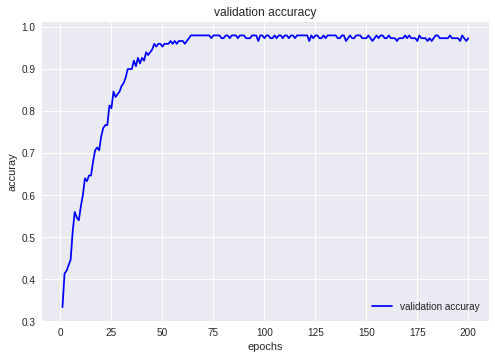

In [32]:
import matplotlib.pyplot as plt

epochs= range(1,201)

# "bo" is for "blue dot"
plt.plot(epochs, np.mean(val_acc,axis=0), 'b', label='validation accuray')
# b is for "solid blue line"
#plt.plot(epochs,np.mean(acc,axis=0), 'b', label='Validation loss')
plt.title('validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuray')
plt.legend()

plt.show()

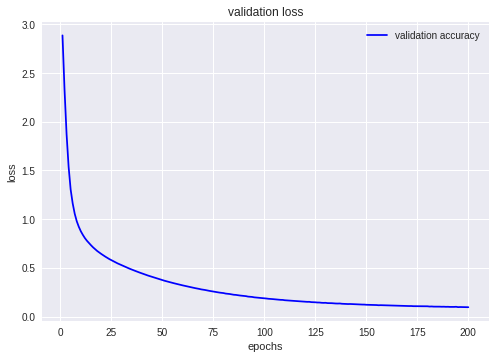

In [33]:
import matplotlib.pyplot as plt

epochs= range(1,201)

# "bo" is for "blue dot"
plt.plot(epochs, np.mean(val_loss,axis=0), 'b', label='validation accuracy')
# b is for "solid blue line"
#plt.plot(epochs,np.mean(acc,axis=0), 'b', label='Validation loss')
plt.title('validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

plt.show()

**100 EPOCHS SEEMS GOOD CHOICE **

***Training our model at 100 epoch*** 

**Step 7. Tuning the Model**

In [41]:
#tuned model

val_loss=[]
train_loss=[]
acc=[]
val_acc=[]
np.random.seed(seed)
num_of_epochs=100
def tuned_model():
    model=Sequential()
    model.add(Dense(8,activation='relu',input_shape=(4,)))
    model.add(Dense(3,activation='softmax'))
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=["accuracy"])
    return model
skf=StratifiedKFold(n_splits=10,shuffle=True, random_state=seed)
skf.get_n_splits(X,encoded_Y)
for train_index , test_index in skf.split(X, encoded_Y):
    model=tuned_model()
    history=model.fit(X[train_index],dummy_y[train_index],epochs=num_of_epochs,batch_size=5,verbose=0,
                     validation_data=(X[test_index],dummy_y[test_index]))
    val_loss.append(history.history['val_loss'])
    train_loss.append(history.history['loss'])
    acc.append(history.history['acc'])

    val_acc.append(history.history['val_acc'])

In [42]:
"""https://docs.scipy.org/doc/numpy/reference/generated/numpy.mean.html"""

print("validation accuracy=",np.mean(np.mean(val_acc,axis=1)))

('validation accuracy=', 0.862466669778029)


**Step 8. Rewriting the code using the Keras Functional API**

In [52]:
# functional API

from sklearn.model_selection import KFold
from keras.layers import Input, Dense
from keras.models import Model

def functional_api():
  # This returns a tensor
  inputs = Input(shape=(4,))

  # a layer instance is callable on a tensor, and returns a tensor
  x = Dense(8, activation='relu')(inputs)
  predictions = Dense(3, activation='softmax')(x)

  # This creates a model that includes
  # the Input layer and three Dense layers
  model = Model(inputs=inputs, outputs=predictions)
  model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
  return model


estimator = KerasClassifier(build_fn=functional_api, epochs=100, batch_size=5, verbose=0)

kfold = KFold(n_splits=10, shuffle=True, random_state=seed)

results = cross_val_score(estimator, X, dummy_y, cv=kfold)
print("functional api model with 100 epoch: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))



functional api model with 100 epoch: 95.33% (5.21%)


In [18]:
import keras
from keras import layers
from keras import models
import tensorflow as tf


class MyModel(tf. keras.Model):
  def __init__(self):
    super(MyModel,self).__init__()
    self.dense1 = Dense(4, activation="relu")
    self.dense2 = Dense(8, activation='relu')
    self.dense3 = Dense(3, activation='softmax')

  def call(self,inputs):
    x = self.dense1(inputs)
    x = self.dense2(x)
    return self.dense3(x)

model=MyModel()
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
#return model

#np.random.seed(seed)

#hist=model.fit(X,dummy_y,epochs=4,batch_size=5)

#estimator=KerasClassifier(build_fn=create_baseline_3,epochs=100,batch_size=5,verbose=0)
#kfold=KFold(n_splits=10,random_state=seed,shuffle=True)
#results=cross_val_score(estimator,X,dummy_y,cv=kfold)
#print("model sub classing: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))


**Step 10. Rewriting the code without using scikit-learn**

In [57]:
def keras_only():
#creating a model
    
    model=Sequential()
    model.add(Dense(8, activation='relu', input_shape=(4,)))
    model.add(Dense(3, activation='softmax'))
    
    #compiling it
    model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
    return model


In [59]:
# k fold code

import numpy as np
k =10
num_val_samples = len(X) // k
num_epochs = 100
all_scores = []

#following lists have mean values at every k fold
acc=[]
loss=[]
val_acc=[]
val_loss=[]

#following 2 lists have the accuracies for every epoch
acc_epoch=[]
val_acc_epoch=[]

for i in range(k):
  print('processing fold #', i)
  val_data = X[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = dummy_y[i * num_val_samples: (i + 1) * num_val_samples]
  partial_train_data = np.concatenate(
  [X[:i * num_val_samples],
  X[(i + 1) * num_val_samples:]],
  axis=0)
  partial_train_targets = np.concatenate(
  [dummy_y[:i * num_val_samples],
  dummy_y[(i + 1) * num_val_samples:]],
  axis=0)
  model =keras_only()
  hist=model.fit(partial_train_data, partial_train_targets,
  epochs=num_epochs, batch_size=1,validation_data=(val_data,val_targets),verbose=0)
  
  #taking mean of acc and losses for plotting
  acc.append(np.mean(hist.history["acc"]))
  loss.append(np.mean(hist.history["loss"]))

  val_acc.append(np.mean(hist.history["val_acc"]))
  val_loss.append(np.mean(hist.history["val_loss"]))
  
  acc_epoch.append(hist.history["acc"])
  val_acc_epoch.append(hist.history["val_acc"])
  

('processing fold #', 0)
('processing fold #', 1)
('processing fold #', 2)
('processing fold #', 3)
('processing fold #', 4)
('processing fold #', 5)
('processing fold #', 6)
('processing fold #', 7)
('processing fold #', 8)
('processing fold #', 9)


In [33]:
#diff results at epochs 
#L.H.S=EPOCHS
#R.H.S=VALIDATION ACCURACY

"""65=78.26
   75=84.52 
   100=86.246
"""